<a href="https://colab.research.google.com/github/FranklineMisango/Compiled_Retail_Stores_Sales_MLPrediction/blob/main/Adidas_sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
!cp '/content/drive/MyDrive/kaggle.json' '/root/.kaggle'

In [7]:
!kaggle datasets download -d heemalichaudhari/adidas-sales-dataset/

100% 661k/661k [00:00<00:00, 1.10MB/s]
100% 661k/661k [00:00<00:00, 1.10MB/s]


In [51]:
!unzip adidas-sales-dataset.zip

Archive:  adidas-sales-dataset.zip
  inflating: Adidas US Sales Datasets.xlsx  


In [9]:
# importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [52]:
df = pd.read_excel("/content/adidas.xlsx")

In [53]:
df.to_csv('/content/adidas.csv', index=False)

In [54]:
sales_details = pd.read_csv('/content/adidas.csv')
sales_details.head(5)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,NaN,NaN,Adidas Sales Database,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
4,NaN,Foot Locker,1185732,2020-01-01 00:00:00,Northeast,New York,New York,Men's Street Footwear,50,1200,600000,300000,0.5,In-store


In [55]:
#cleaning the csv from the unanamed columns and rows
sales_details = sales_details.drop( "Unnamed: 0", axis = "columns")

In [56]:
sales_details = sales_details.dropna(how='all')

In [61]:
sales_detail=sales_details.drop(df.index[0])

In [69]:
sales_detail.head(1)

,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
3,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method


In [70]:
sales_detail = sales_detail.rename(columns={"Unnamed: 1": "Retailer"})
sales_detail = sales_detail.rename(columns={"Unnamed: 2": "Retailer ID"})
sales_detail = sales_detail.rename(columns={"Unnamed: 3": "Invoice Date"})
sales_detail = sales_detail.rename(columns={"Unnamed: 4": "Region"})
sales_detail = sales_detail.rename(columns={"Unnamed: 5": "State"})
sales_detail = sales_detail.rename(columns={"Unnamed: 6": "City"})
sales_detail = sales_detail.rename(columns={"Unnamed: 7": "Product"})
sales_detail = sales_detail.rename(columns={"Unnamed: 8": "Price per unit"})
sales_detail = sales_detail.rename(columns={"Unnamed: 9": "Units Sold"})
sales_detail = sales_detail.rename(columns={"Unnamed: 10": "Total Sales"})
sales_detail = sales_detail.rename(columns={"Unnamed: 11": "Operating Profit"})
sales_detail = sales_detail.rename(columns={"Unnamed: 12": "Operating Margin"})
sales_detail = sales_detail.rename(columns={"Unnamed: 13": "Sales Method"})


In [71]:
sales_detail.head(2)

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
3,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
4,Foot Locker,1185732,2020-01-01 00:00:00,Northeast,New York,New York,Men's Street Footwear,50,1200,600000,300000,0.5,In-store


In [73]:
sales_detail=sales_detail.drop(df.index[3])

In [74]:
sales_detail.head(5)

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
4,Foot Locker,1185732,2020-01-01 00:00:00,Northeast,New York,New York,Men's Street Footwear,50,1200,600000,300000,0.5,In-store
5,Foot Locker,1185732,2020-01-02 00:00:00,Northeast,New York,New York,Men's Athletic Footwear,50,1000,500000,150000,0.3,In-store
6,Foot Locker,1185732,2020-01-03 00:00:00,Northeast,New York,New York,Women's Street Footwear,40,1000,400000,140000,0.35,In-store
7,Foot Locker,1185732,2020-01-04 00:00:00,Northeast,New York,New York,Women's Athletic Footwear,45,850,382500,133875,0.35,In-store
8,Foot Locker,1185732,2020-01-05 00:00:00,Northeast,New York,New York,Men's Apparel,60,900,540000,162000,0.3,In-store


In [75]:
#Now that we have clean data, time to investigate other aspects of the data
# missing values in the dataset
print("Total size of dataset: ", len(sales_detail))
print(sales_detail.isnull().sum())

Total size of dataset:  9648
Retailer            0
Retailer ID         0
Invoice Date        0
Region              0
State               0
City                0
Product             0
Price per unit      0
Units Sold          0
Total Sales         0
Operating Profit    0
Operating Margin    0
Sales Method        0
dtype: int64


<ipython-input-85-1ca419054b71>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = sales_detail,


[Text(0.5, 1.0, 'Number of Sales  per Method'),
 Text(0.5, 0, 'Sales Method'),
 Text(0, 0.5, 'Total sales')]

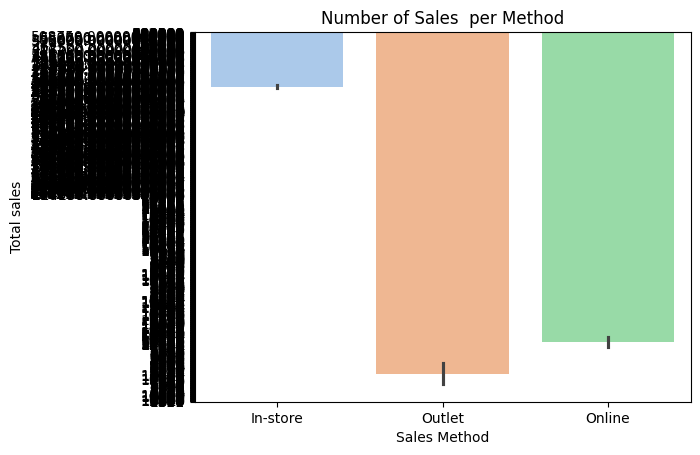

In [85]:
# Our case study involves understanding which aspects generate more sales...We begin by visualizations
# Which city has the highest sales

#fig, ax = plt.subplots(2, 1, figsize=(15, 15))
sns.barplot(data = sales_detail,
            palette='pastel',
            x = 'Sales Method',
            y = 'Total Sales').set(title = 'Number of Sales  per Method',
                                xlabel = 'Sales Method',
                                ylabel = 'Total sales')


In [ ]:
sns.barplot(ax = ax[1],
            data = subcat_count,
            palette = 'deep',
            x = 'count',
            y = 'index').set(title = 'Number of Products per Subcategory',
                                   xlabel = 'Number of Products',
                                   ylabel = 'Subcategory')
ax[0].bar_label(ax[0].containers[0])
ax[1].bar_label(ax[1].containers[0])
plt.show()